#### Lineal Regression: Conductivity 

### Se importan las librerias

In [6]:
# Importo las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Se cargan los datos

In [7]:
datos = pd.read_csv("data/Sp.csv", sep=";")

datos

,Date (m/d/y),Day,Time,Sample,Sp Cond 80ft (µS/cm),Sp Cond 1100 ft (µS/cm),Difference
0,25/01/05,1,12:30,1,281,284,3
1,25/01/05,1,12:31,2,281,283,2
2,25/01/05,1,12:32,3,281,283,2
3,25/01/05,1,12:33,4,281,283,2
4,25/01/05,1,12:34,5,281,284,3
...,...,...,...,...,...,...,...
613,26/01/05,2,3:56,313,287,289,2
614,26/01/05,2,3:57,314,287,289,2
615,26/01/05,2,3:58,315,287,289,2
616,26/01/05,2,3:59,316,287,289,2


In [8]:
# Se observan las estadísticas
datos.describe()

,Day,Sample,Sp Cond 80ft (µS/cm),Sp Cond 1100 ft (µS/cm),Difference
count,618.000000,618.000000,618.000000,618.000000,618.000000
mean,1.512945,155.103560,283.726537,286.072816,2.346278
std,0.500237,89.451683,2.616115,2.221059,0.626141
min,1.000000,1.000000,281.000000,283.000000,1.000000
25%,1.000000,78.000000,281.000000,284.000000,2.000000
50%,2.000000,155.000000,285.000000,287.000000,2.000000
75%,2.000000,232.000000,286.000000,288.000000,3.000000
max,2.000000,317.000000,287.000000,289.000000,3.000000


In [9]:
dia1 = datos[datos['Day'] == 1]
dia2 = datos[datos['Day'] == 2]

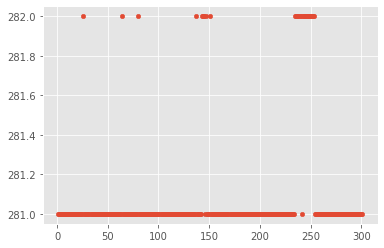

In [10]:
# Defino el tamaño de la gráfica
tamanio = [20,40]

# Traigo los valores del dia 1
x1= dia1['Sample'].values
# Traigo los valores de # Shares
y1 = dia1['Sp Cond 80ft (µS/cm)'].values

# Genero la gráfica
plt.scatter(x1, y1, s=tamanio[0])
plt.show()

#### Regresión Lineal Chloride 80ft (mg/L) - Día 1

In [16]:
# Asigno la variable de entrada X para entrenamiento y las etiquetas Y
X_train = dia1[['Sample']].values
y_train = dia1[['Sp Cond 80ft (µS/cm)']].values

# Se crea un objeto de regresión lineal
reg_lineal = linear_model.LinearRegression()

# Se entrena el modelo
reg_lineal.fit(X_train, y_train)

# Se hace las predicciones (linea en 2D)
y_pred = reg_lineal.predict(X_train)

# Se obtienen los coeficiones, según la Tangente
print('Coeficiente:', reg_lineal.coef_)
# Valor de la intercepción (valor donde corta el eje Y en X=0)
print('Intercepción:', reg_lineal.intercept_)
# Error cuadrático medio
print('Error Cuadrático Medio: %.2f' % mean_squared_error(y_train, y_pred))
# Puntaje de varianza, el mejor puntaje es un 1.0
print('R2: %.2f' % r2_score(y_train, y_pred))

Coeficiente: [[0.00059625]]
Intercepción: [280.99966777]
Error Cuadrático Medio: 0.08
R2: 0.03


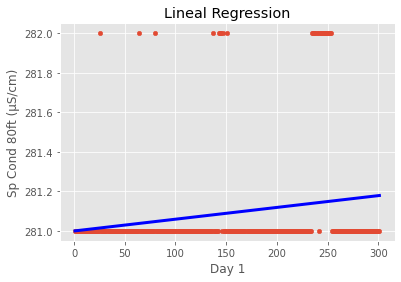

In [17]:
plt.scatter(X_train[:,0], y_train, s=tamanio[0])
plt.plot(X_train[:,0], y_pred, color='blue', linewidth=3)

plt.xlabel('Day 1')
plt.ylabel('Sp Cond 80ft (µS/cm)')
plt.title('Lineal Regression')

plt.show()

#### Regresión Lineal Chloride 80ft (mg/L) - Día 2

In [18]:
# Asigno la variable de entrada X para entrenamiento y las etiquetas Y
X_train = dia2[['Sample']].values
y_train = dia2[['Sp Cond 80ft (µS/cm)']].values

# Se crea un objeto de regresión lineal
reg_lineal = linear_model.LinearRegression()

# Se entrena el modelo
reg_lineal.fit(X_train, y_train)

# Se hace las predicciones (linea en 2D)
y_pred = reg_lineal.predict(X_train)

# Se obtienen los coeficiones, según la Tangente
print('Coeficiente:', reg_lineal.coef_)
# Valor de la intercepción (valor donde corta el eje Y en X=0)
print('Intercepción:', reg_lineal.intercept_)
# Error cuadrático medio
print('Error Cuadrático Medio: %.2f' % mean_squared_error(y_train, y_pred))
# Puntaje de varianza, el mejor puntaje es un 1.0
print('R2: %.2f' % r2_score(y_train, y_pred))

Coeficiente: [[0.00515867]]
Intercepción: [285.41005471]
Error Cuadrático Medio: 0.15
R2: 0.60


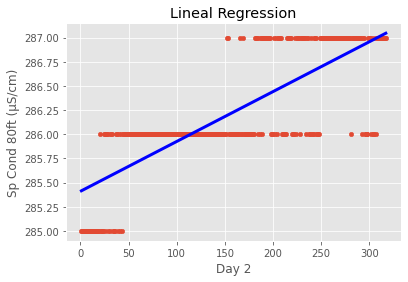

In [19]:
plt.scatter(X_train[:,0], y_train, s=tamanio[0])
plt.plot(X_train[:,0], y_pred, color='blue', linewidth=3)

plt.xlabel('Day 2')
plt.ylabel('Sp Cond 80ft (µS/cm)')
plt.title('Lineal Regression')

plt.show()

#### Regresión Lineal Chloride 1100ft (mg/L) - Día 1

In [20]:
# Asigno la variable de entrada X para entrenamiento y las etiquetas Y
X_train = dia1[['Sample']].values
y_train = dia1[['Sp Cond 1100 ft (µS/cm)']].values

# Se crea un objeto de regresión lineal
reg_lineal = linear_model.LinearRegression()

# Se entrena el modelo
reg_lineal.fit(X_train, y_train)

# Se hace las predicciones (linea en 2D)
y_pred = reg_lineal.predict(X_train)

# Se obtienen los coeficiones, según la Tangente
print('Coeficiente:', reg_lineal.coef_)
# Valor de la intercepción (valor donde corta el eje Y en X=0)
print('Intercepción:', reg_lineal.intercept_)
# Error cuadrático medio
print('Error Cuadrático Medio: %.2f' % mean_squared_error(y_train, y_pred))
# Puntaje de varianza, el mejor puntaje es un 1.0
print('R2: %.2f' % r2_score(y_train, y_pred))

Coeficiente: [[0.00025126]]
Intercepción: [283.80591362]
Error Cuadrático Medio: 0.13
R2: 0.00


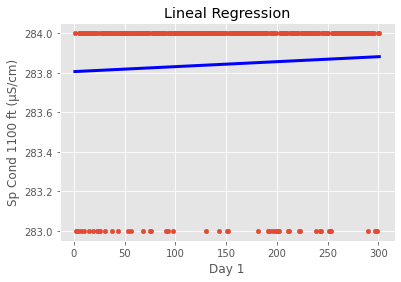

In [21]:
plt.scatter(X_train[:,0], y_train, s=tamanio[0])
plt.plot(X_train[:,0], y_pred, color='blue', linewidth=3)

plt.xlabel('Day 1')
plt.ylabel('Sp Cond 1100 ft (µS/cm)')
plt.title('Lineal Regression')

plt.show()

#### Regresión Lineal Chloride 1100ft (mg/L) - Día 2

In [22]:
# Asigno la variable de entrada X para entrenamiento y las etiquetas Y
X_train = dia2[['Sample']].values
y_train = dia2[['Sp Cond 1100 ft (µS/cm)']].values

# Se crea un objeto de regresión lineal
reg_lineal = linear_model.LinearRegression()

# Se entrena el modelo
reg_lineal.fit(X_train, y_train)

# Se hace las predicciones (linea en 2D)
y_pred = reg_lineal.predict(X_train)

# Se obtienen los coeficiones, según la Tangente
print('Coeficiente:', reg_lineal.coef_)
# Valor de la intercepción (valor donde corta el eje Y en X=0)
print('Intercepción:', reg_lineal.intercept_)
# Error cuadrático medio
print('Error Cuadrático Medio: %.2f' % mean_squared_error(y_train, y_pred))
# Puntaje de varianza, el mejor puntaje es un 1.0
print('R2: %.2f' % r2_score(y_train, y_pred))

Coeficiente: [[0.00437361]]
Intercepción: [287.49387054]
Error Cuadrático Medio: 0.12
R2: 0.57


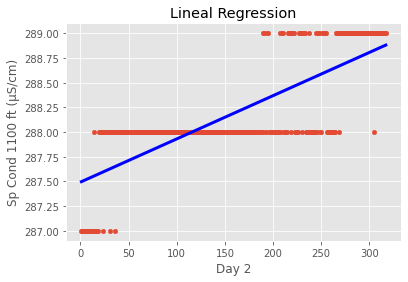

In [23]:
plt.scatter(X_train[:,0], y_train, s=tamanio[0])
plt.plot(X_train[:,0], y_pred, color='blue', linewidth=3)

plt.xlabel('Day 2')
plt.ylabel('Sp Cond 1100 ft (µS/cm)')
plt.title('Lineal Regression')

plt.show()